# **단변량 분석 - 수치형**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
#  환경 준비
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

%config InlineBackend.figure_format='retina'

# matplotlib의 기본 그래프 크기 설정
plt.rcParams['figure.figsize'] = (6, 4)

In [3]:
# 데이터 읽어오기
path = '/content/drive/MyDrive/DataForSudy/titanic_simple.csv'
titanic = pd.read_csv(path)

# 확인
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,Southampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,Southampton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,Southampton
4,5,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,Southampton


In [4]:
# 데이터 읽어오기
path = '/content/drive/MyDrive/DataForSudy/airquality2.csv'
air = pd.read_csv(path)

# 확인
air.head()

,Ozone,Solar.R,Wind,Temp,Date
0,41,190.0,7.4,67,1973-05-01
1,36,118.0,8.0,72,1973-05-02
2,12,149.0,12.6,74,1973-05-03
3,18,313.0,11.5,62,1973-05-04
4,19,NaN,14.3,56,1973-05-05


In [7]:
# 평균
print(titanic['Fare'].mean())

32.204207968574636


In [8]:
# 중앙값
titanic['Fare'].median()

14.4542

In [12]:
#최빈값
titanic['Pclass'].mode()

,Pclass
0,3


In [13]:
print(titanic['Pclass'].mode()[0])

3


In [18]:
# 기술통계(4분위 수 포함)
titanic['Fare'].describe()

,Fare
count,891.000000
mean,32.204208
std,49.693429
min,0.000000
25%,7.910400
50%,14.454200
75%,31.000000
max,512.329200


In [20]:
# 세로 방향
titanic[['Age']].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,714.0,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0


In [21]:
print('Q1:', titanic['Fare'].describe()['25%']) # 1사분위수
print('Q2:', titanic['Fare'].describe()['50%']) # 2사분위수
print('Q3:', titanic['Fare'].describe()['75%']) # 3사분위수
print('Q4:', titanic['Fare'].describe()['max']) # 4사분위수

Q1: 7.9104
Q2: 14.4542
Q3: 31.0
Q4: 512.3292


## **시각화**
수치형 변수 단변량 분석을 할 때는 Histogram, Density Plot, Box Plot이 대표적

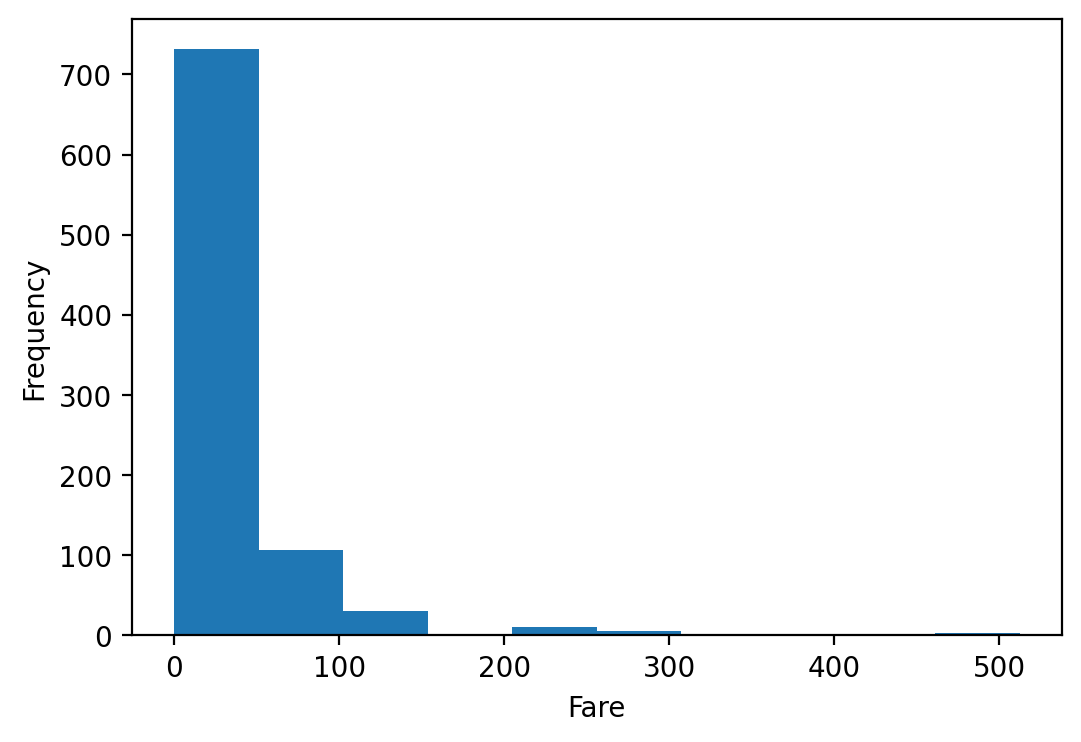

In [22]:
# Histogram
plt.hist(x='Fare', data=titanic, ec='k')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

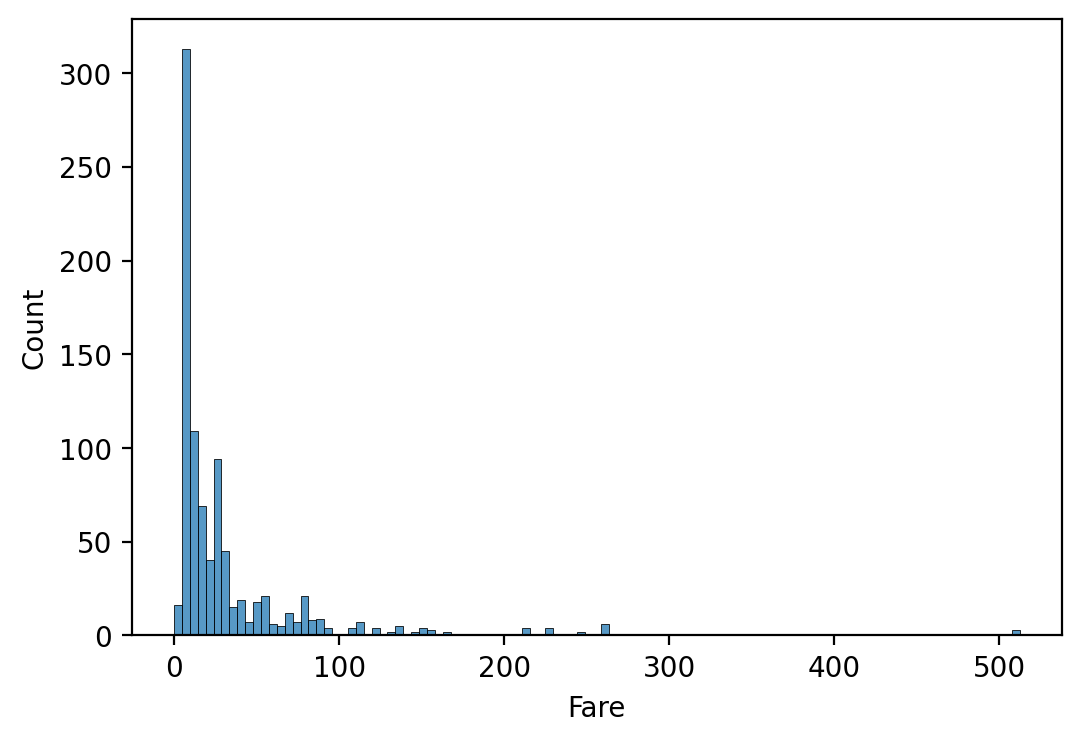

In [23]:
sns.histplot(x='Fare', data=titanic)
plt.show()

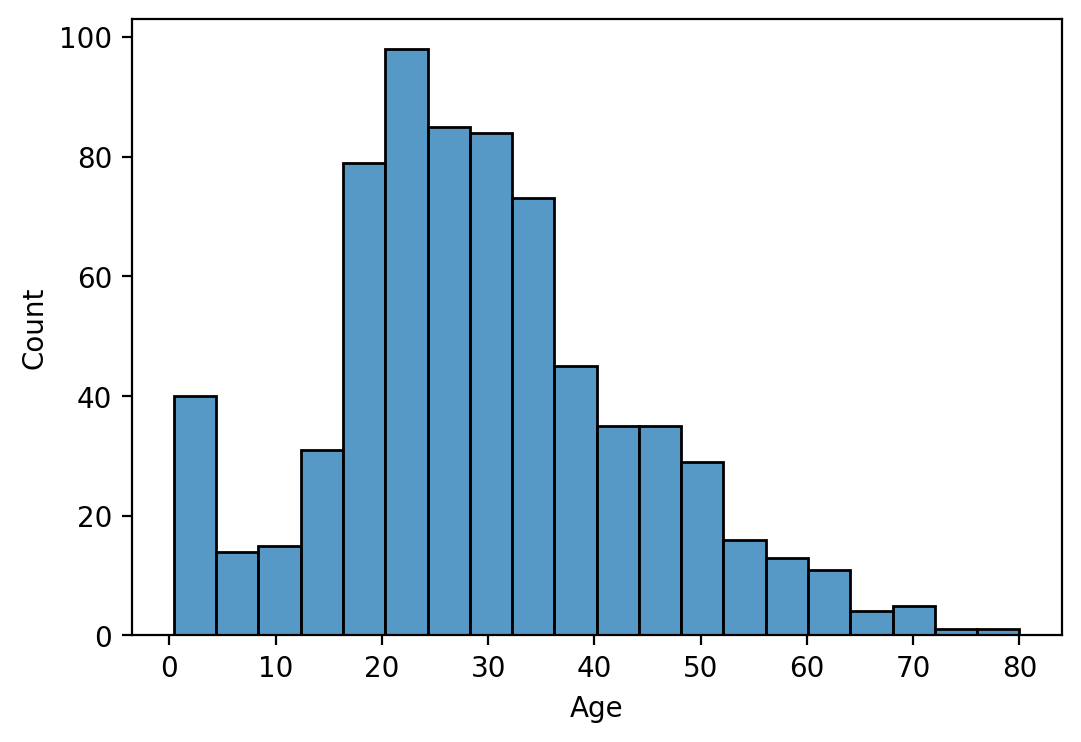

In [24]:
sns.histplot(x='Age', data=titanic)
plt.show()

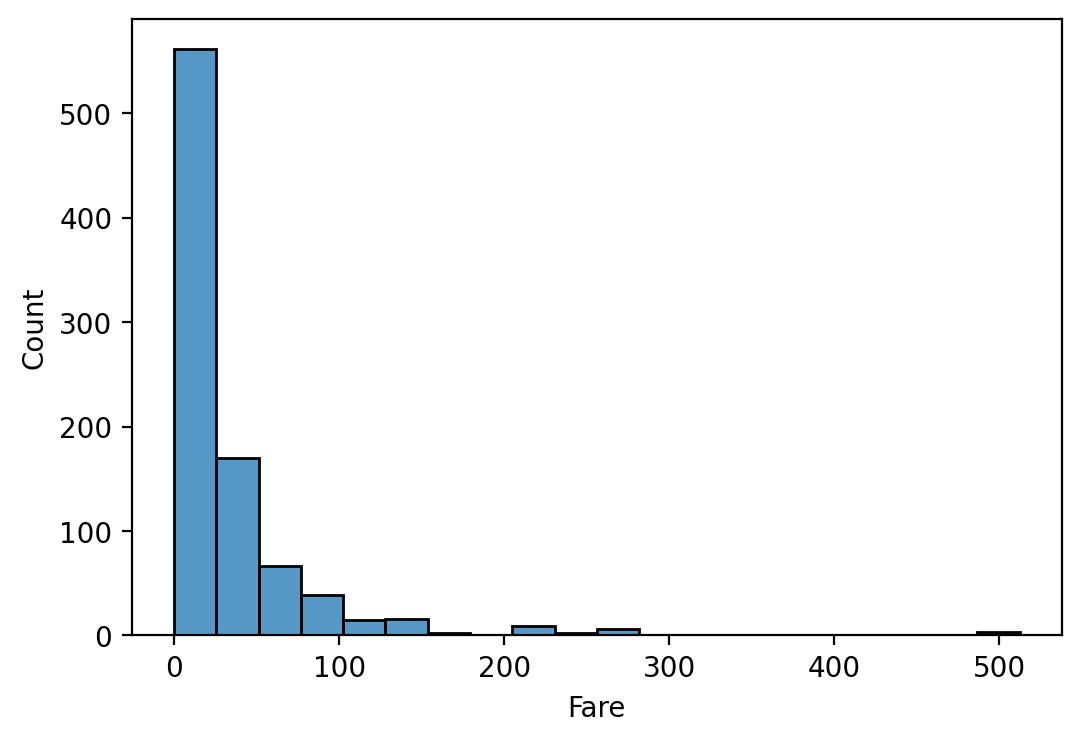

In [25]:
# bins를 사용하여 막대 개수 적절히 조절
sns.histplot(x='Fare', data=titanic, bins=20)
plt.show()

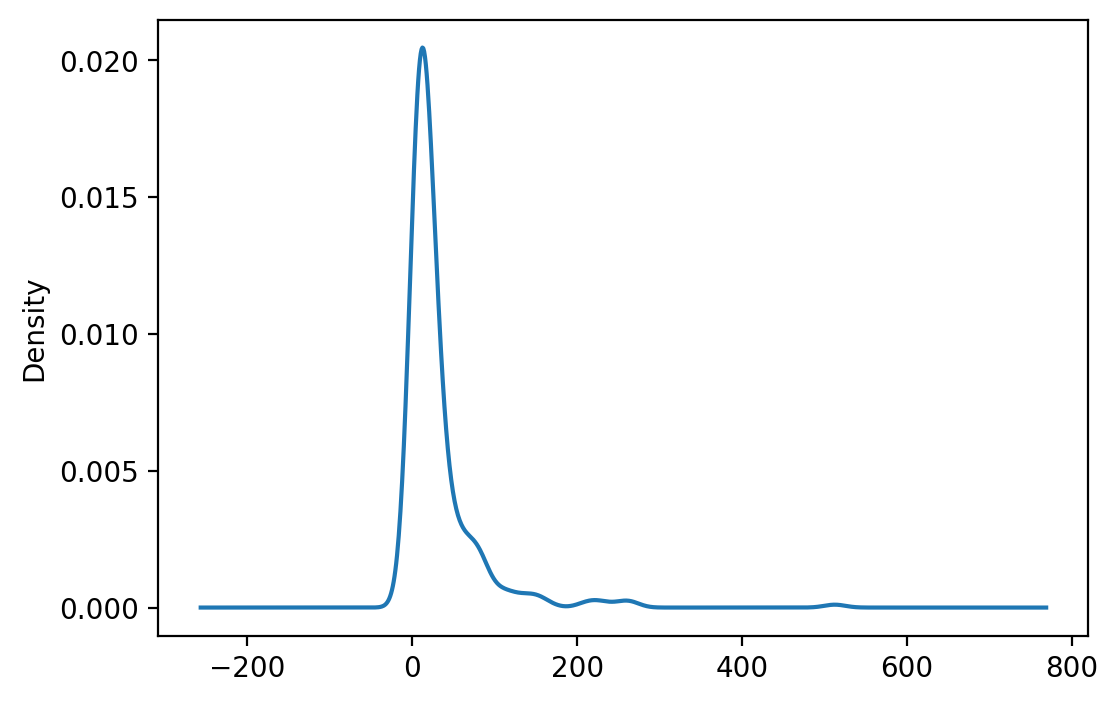

In [26]:
# DensityPlot
titanic['Fare'].plot(kind='kde')
plt.show()

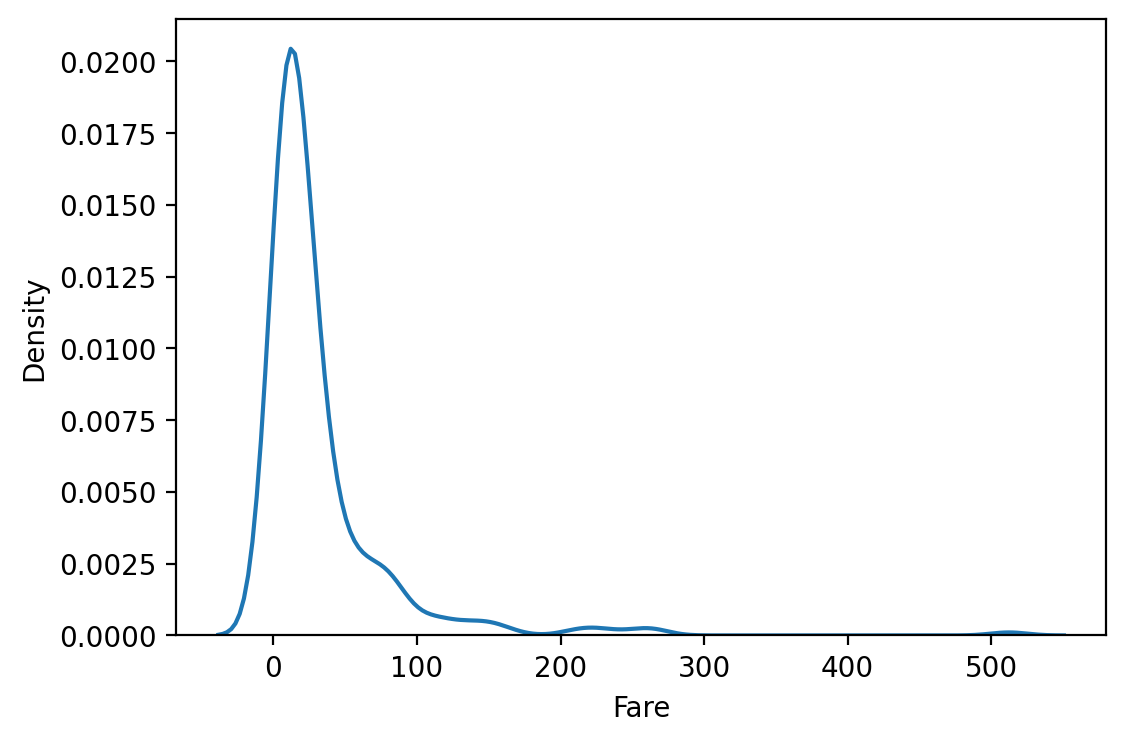

In [27]:
sns.kdeplot(x='Fare', data=titanic)
plt.show()

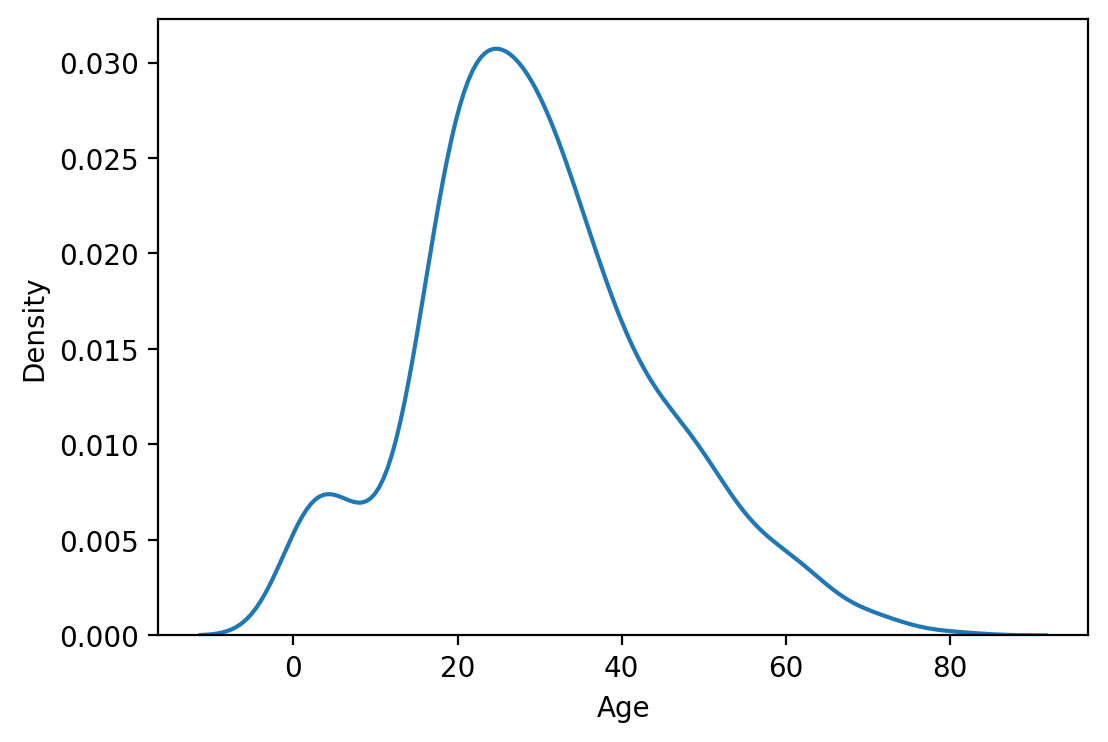

In [28]:
sns.kdeplot(x='Age', data=titanic)
plt.show()

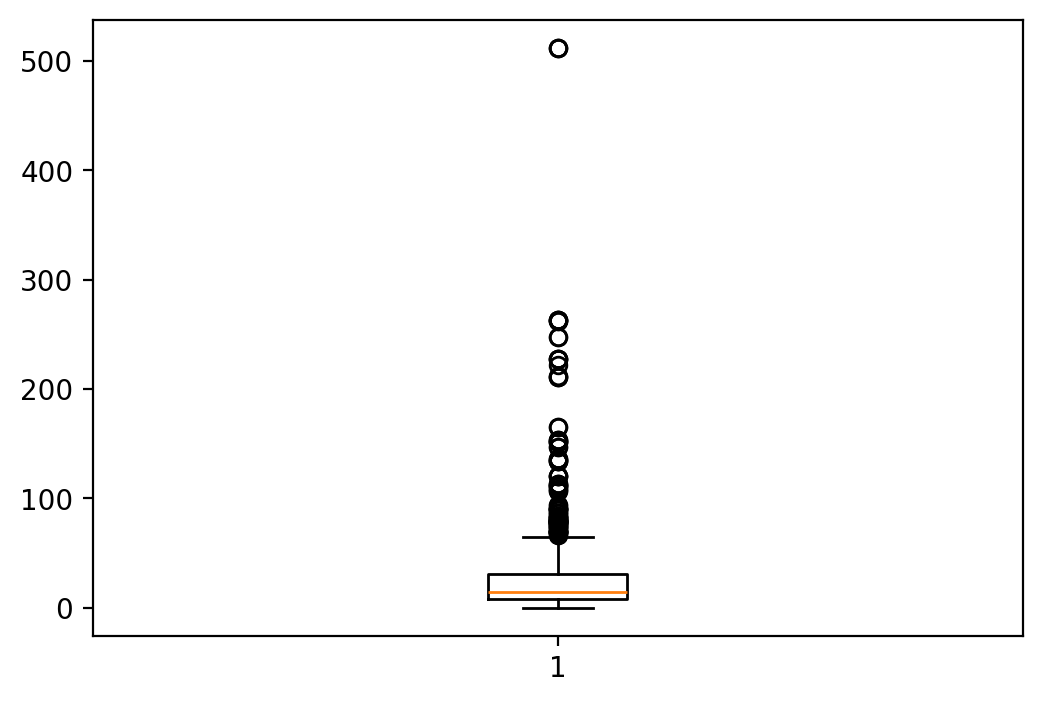

In [29]:
# BoxPlot
plt.boxplot(x='Fare', data=titanic)
plt.show()

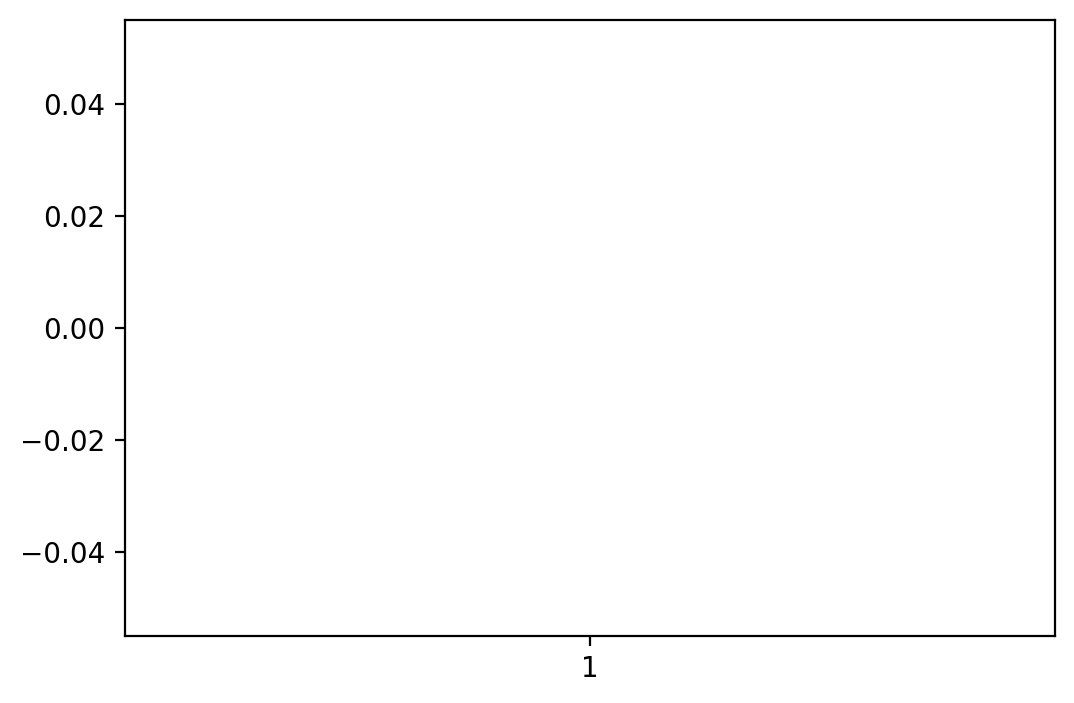

In [31]:
# 결측치가 있다면 그래프가 안그려짐
plt.boxplot(x='Age', data=titanic)
plt.show()

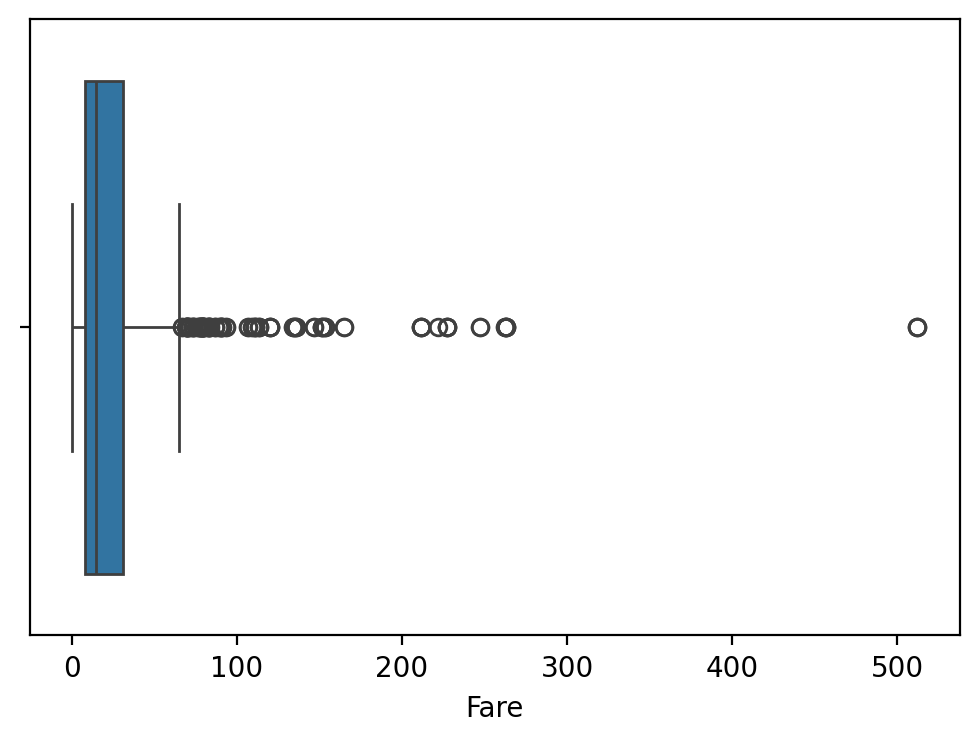

In [32]:
sns.boxplot(x='Fare', data=titanic)
plt.show()

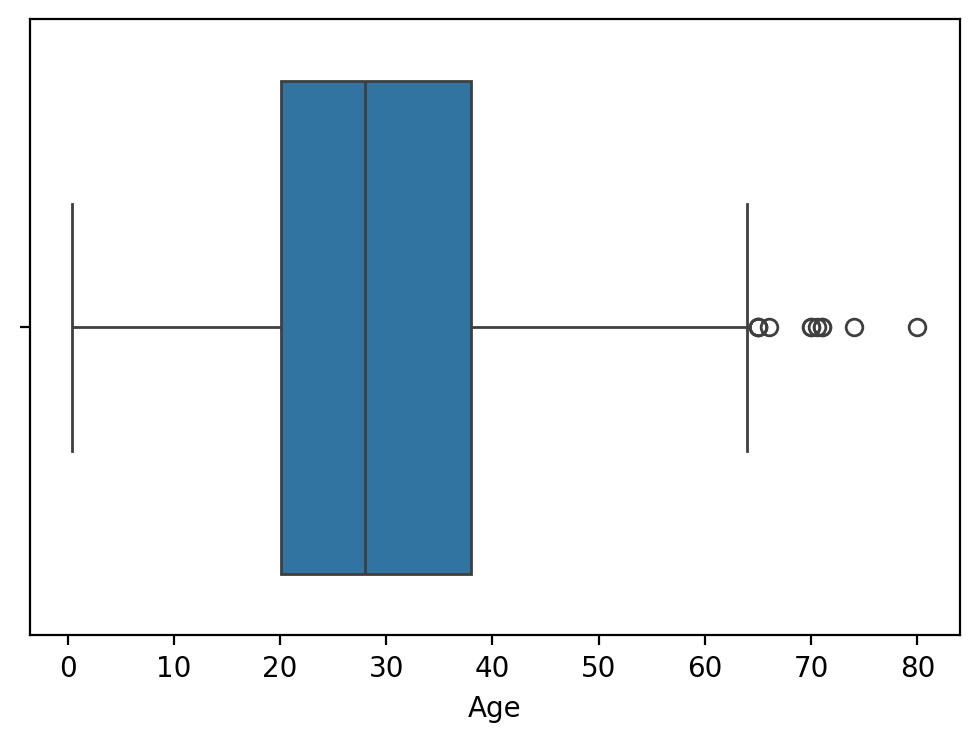

In [34]:
# seaborn은 결측치가 있어도 그려짐
sns.boxplot(x='Age', data=titanic)
plt.show()

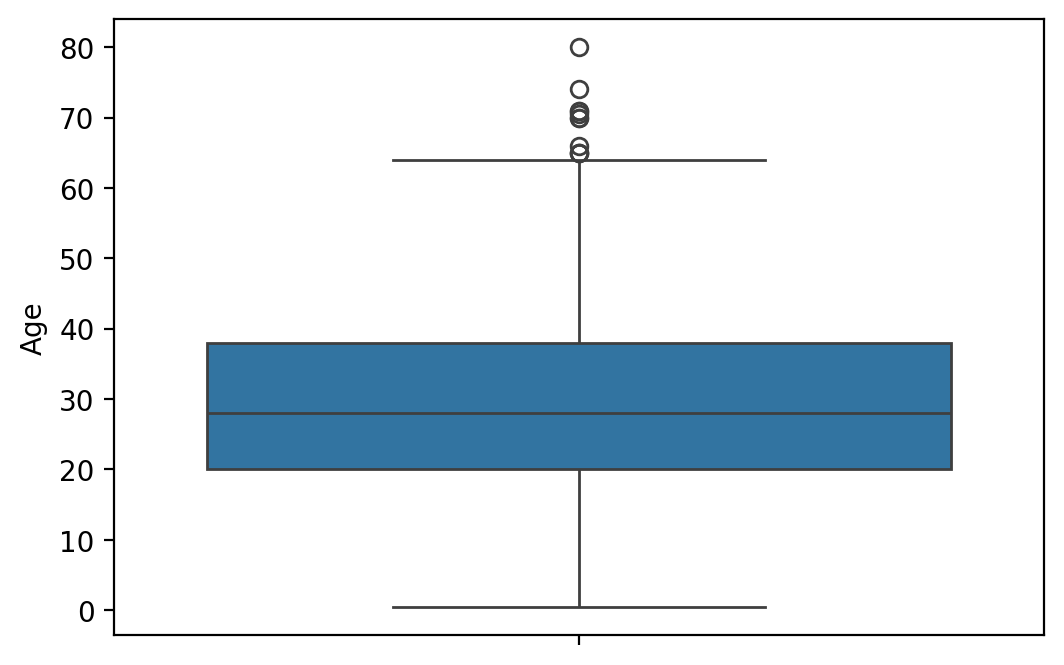

In [36]:
# 세로 방향으로 표시
sns.boxplot(y='Age', data=titanic)
plt.show()

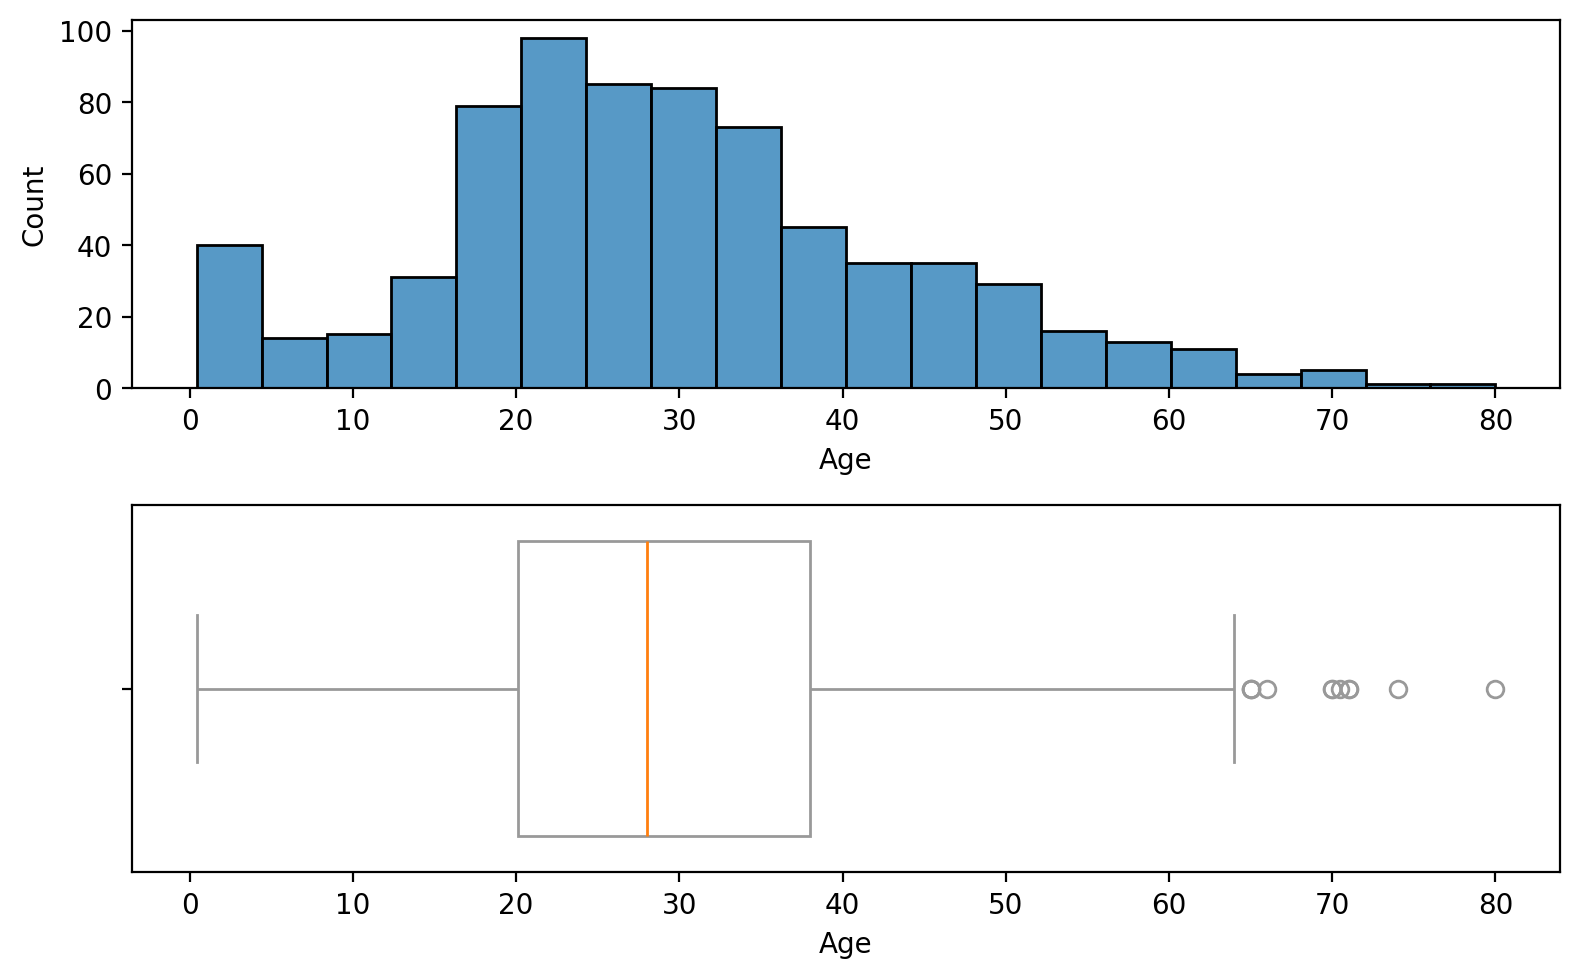

In [37]:
# 여러 그래프를 한꺼번에 그려 데이터를 더 쉽게 파악
plt.figure(figsize=(8, 5))
plt.subplot(2, 1, 1)
sns.histplot(x='Age', bins=20, data=titanic)

plt.subplot(2, 1, 2)
sns.boxplot(x='Age', data=titanic, color='w', medianprops={'color': 'tab:orange'})

plt.tight_layout()
plt.show()

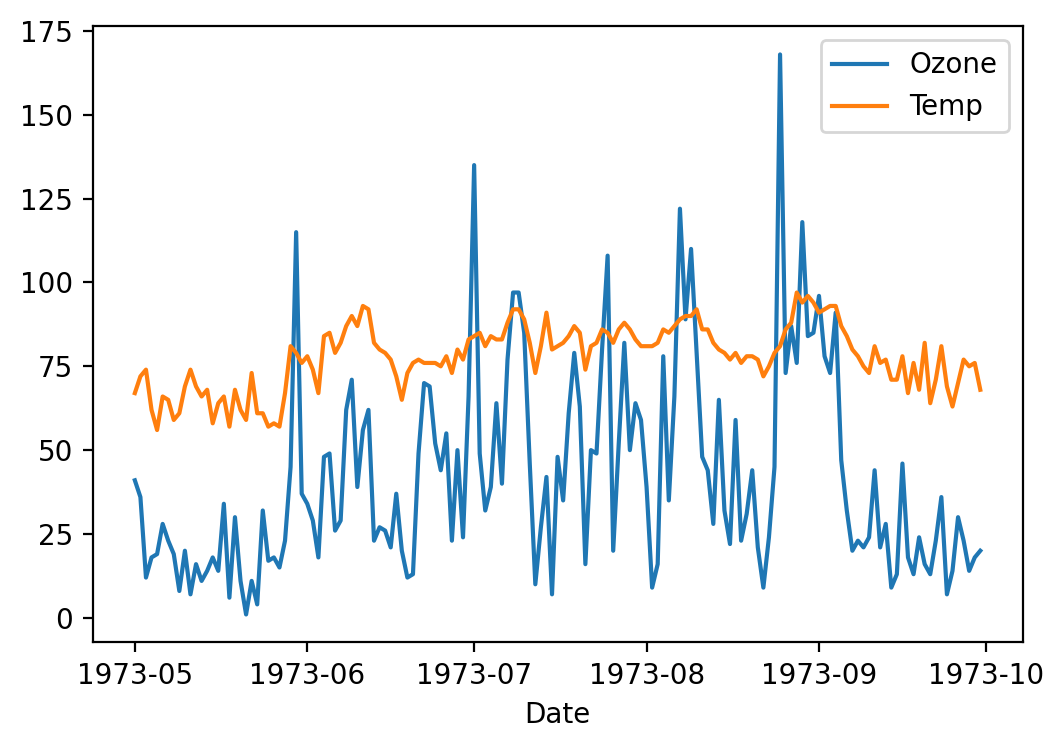

In [39]:
# 시계열 데이터 (matplotlib)
air['Date'] = pd.to_datetime(air['Date'])

plt.plot('Date', 'Ozone', data=air, label='Ozone')
plt.plot('Date', 'Temp', data=air, label='Temp')
plt.xlabel('Date')
plt.legend()
plt.show()

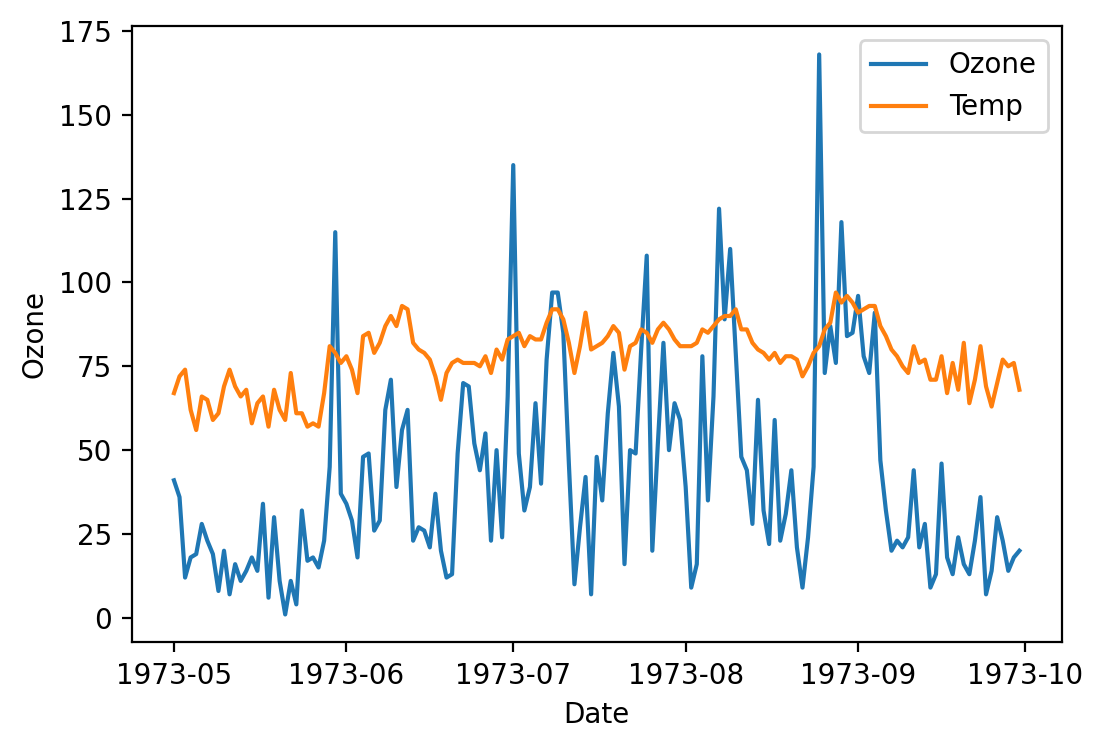

In [40]:
# 시계열 데이터 (seaborn)

sns.lineplot(x='Date', y='Ozone', data=air, label='Ozone')
sns.lineplot(x='Date', y='Temp', data=air, label='Temp')
plt.legend()
plt.show()

# **단변량 분석 - 범주형**

In [41]:
# **단변량 분석 - 범주형

In [42]:
# 데이터 읽어오기
path = '/content/drive/MyDrive/DataForSudy/titanic.1.csv'
titanic = pd.read_csv(path)

# 확인
titanic.head()

,Survived,Pclass,Title,Sex,Age,Fare,Embarked,AgeGroup,Family,Mother
0,0,3,Mr,male,22.0,7.2500,S,Age_20,2,0
1,1,1,Mrs,female,38.0,71.2833,C,Age_30,2,0
2,1,3,Miss,female,26.0,7.9250,S,Age_20,1,0
3,1,1,Mrs,female,35.0,53.1000,S,Age_30,2,0
4,0,3,Mr,male,35.0,8.0500,S,Age_30,1,0


In [43]:
# 수치화
print(titanic['Pclass'].value_counts())
print('-' * 28)
print(titanic['Pclass'].value_counts(normalize=True))

Pclass
3    491
1    216
2    184
Name: count, dtype: int64
----------------------------
Pclass
3    0.551066
1    0.242424
2    0.206510
Name: proportion, dtype: float64


In [44]:
print(titanic['Embarked'].value_counts())
print('-' * 28)
print(titanic['Embarked'].value_counts(normalize=True))

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64
----------------------------
Embarked
S    0.725028
C    0.188552
Q    0.086420
Name: proportion, dtype: float64


In [45]:
print(titanic['Survived'].value_counts())
print('-' * 28)
print(titanic['Survived'].value_counts(normalize=True))

Survived
0    549
1    342
Name: count, dtype: int64
----------------------------
Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64


## **시각화**
범주형 변수 단변량 분석을 할 때는 BarPlot과 PieChart가 대표적

In [47]:
temp = titanic['Pclass'].value_counts()
print(temp.index)
print(temp.values)

Index([3, 1, 2], dtype='int64', name='Pclass')
[491 216 184]


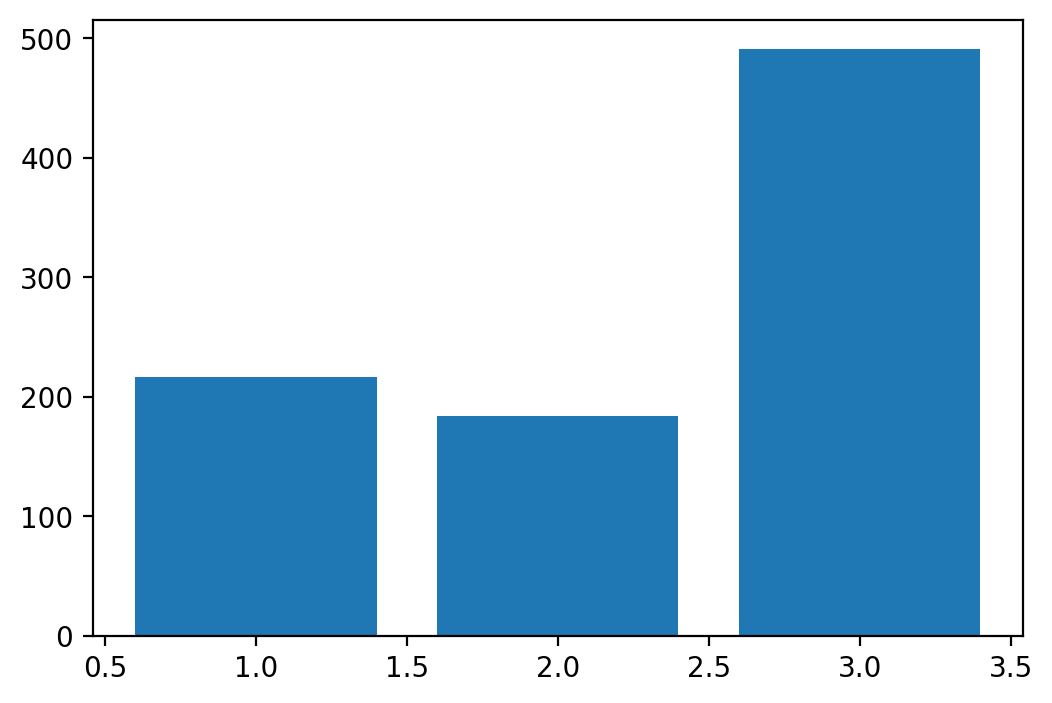

In [48]:
temp = titanic['Pclass'].value_counts()

plt.bar(x=temp.index, height=temp.values)
plt.show()

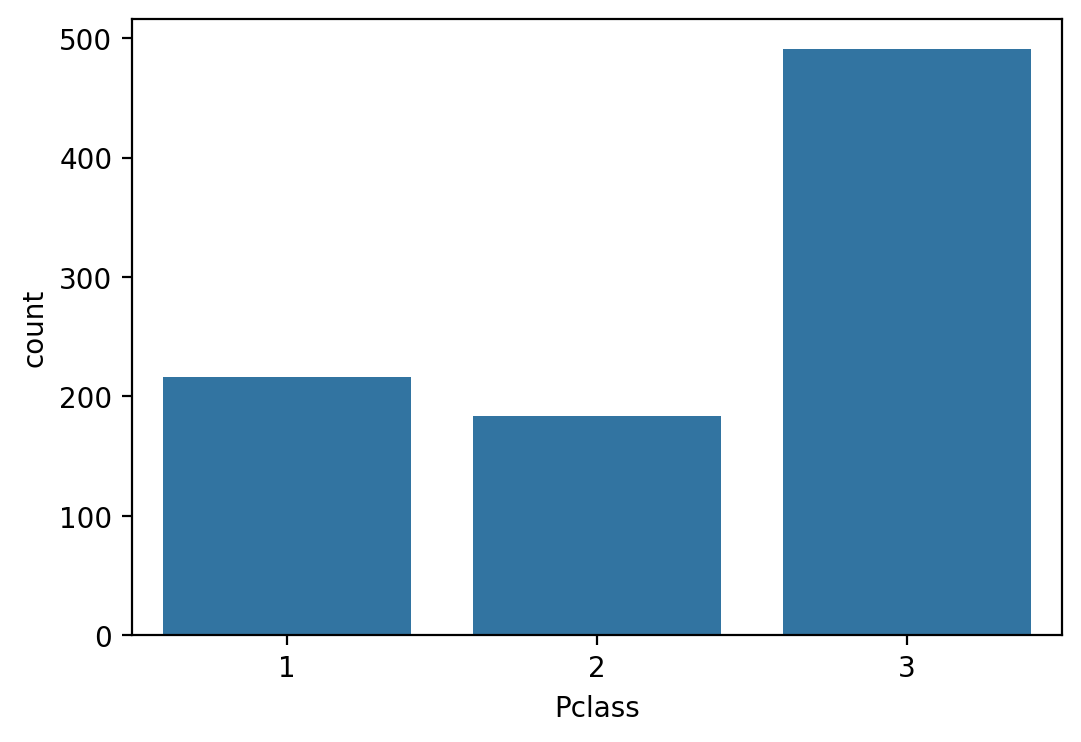

In [49]:
# seaborn의 countplot을 사용하여 간단하게 시각화 가능
sns.countplot(x='Pclass', data=titanic)
plt.show()

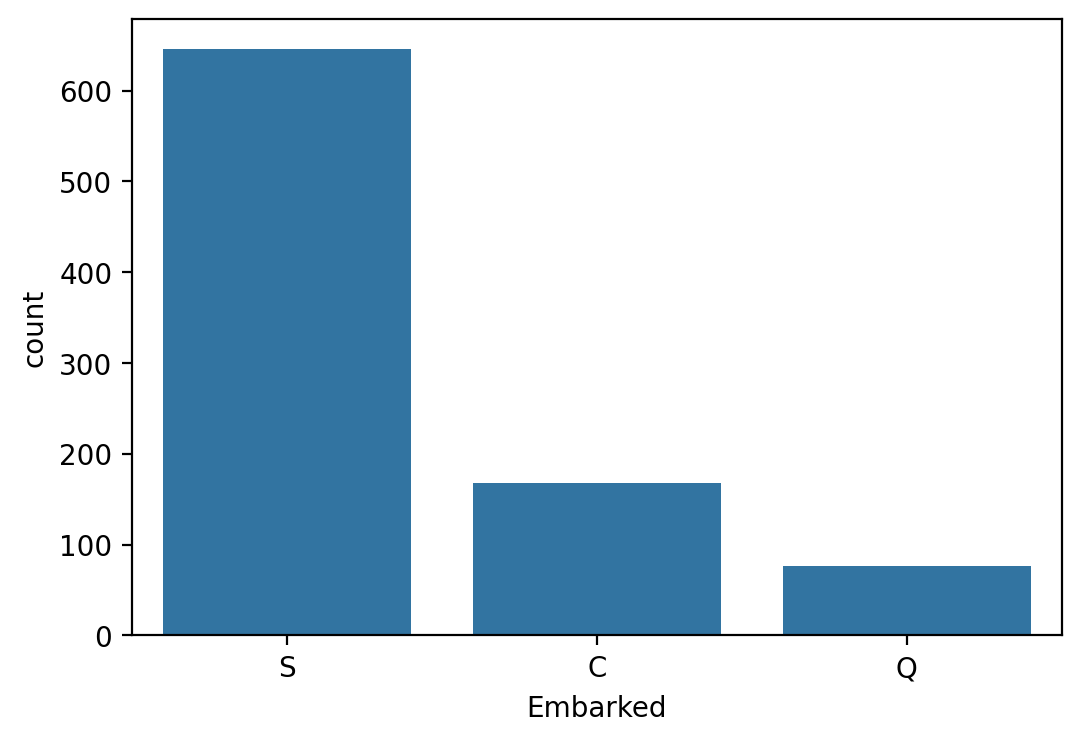

In [50]:
sns.countplot(x='Embarked', data=titanic)
plt.show()

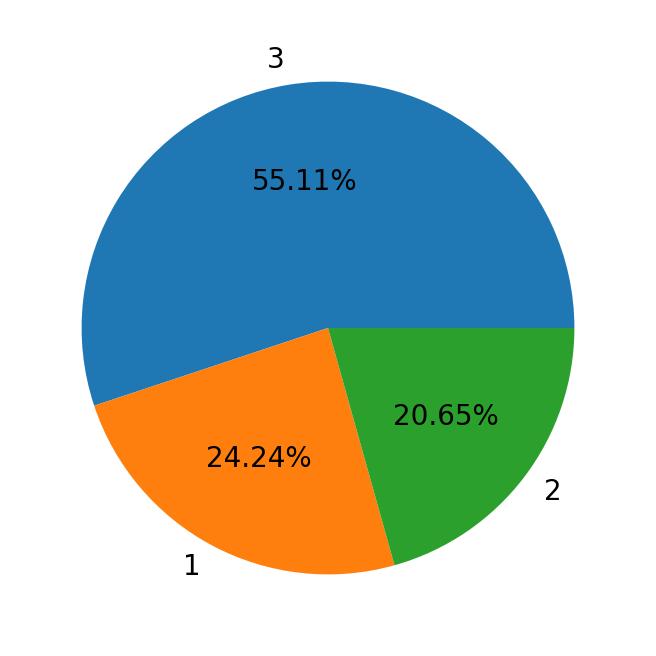

In [51]:
# PieChart
temp = titanic['Pclass'].value_counts()

plt.pie(x=temp.values, labels=temp.index, autopct='%.2f%%')
plt.show()

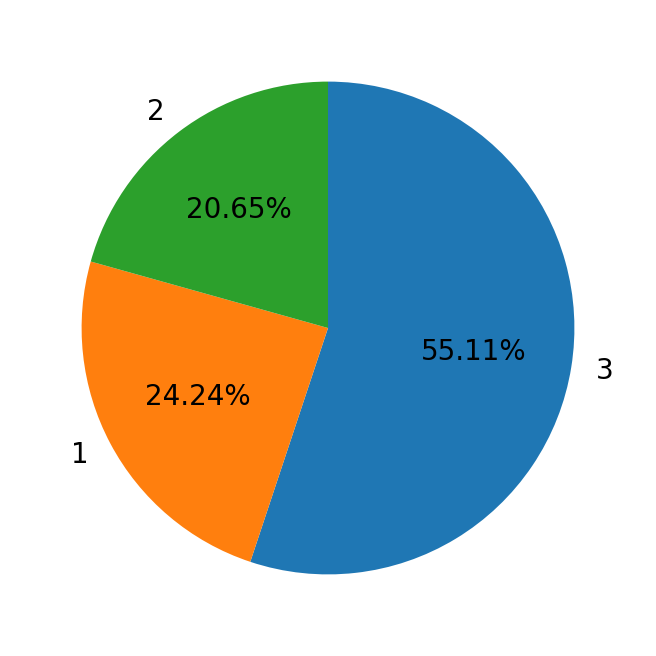

In [53]:
# 디테일한 옵션 조절 가능
plt.pie(x=temp.values,
        labels=temp.index,
        autopct='%.2f%%',
        startangle=90,
        counterclock=False)
plt.show()

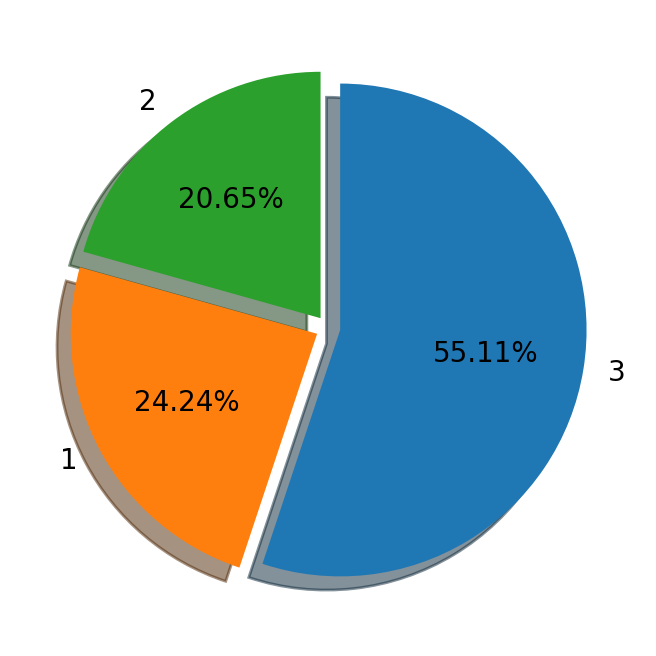

In [54]:
plt.pie(x=temp.values,
        labels=temp.index,
        autopct='%.2f%%',
        startangle=90,
        counterclock=False,
        explode=[0.05, 0.05, 0.05],
        shadow=True)
plt.show()